This notebook is to make all the spectra of a certain file. First, the files are loaded, and after that, the spectra are made one by one. The one that is in the paper is the last one.

In [1]:
import csv
import sys

sys.path.insert(0,"../python/")
from MC_Plots import style

import collections

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from matplotlib.colors import LogNorm

import os
import re
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
ps = style(figure_width = 9,
                 spine_color= 'Black')#set style

In [4]:
#load files
path='/dcache/xenon/olkes/validation/' # folder with my validation files
df_vrt = pd.read_csv(path+'VRT.csv', names=['#','nscatters','w','de','x0','y0','z0','x1','y1','z1','de1','t1','x2','y2','z2','de2','t2','x3','y3','z3','de3','t3','x4','y4','z4','de4','t4'],error_bad_lines=False)
df_vrt_largefid = pd.read_csv(path+'VRT_large_fid.csv', names=['#','nscatters','w','de','x0','y0','z0','x1','y1','z1','de1','t1','x2','y2','z2','de2','t2','x3','y3','z3','de3','t3','x4','y4','z4','de4','t4'],error_bad_lines=False)
df_vrt_E_cut = pd.read_csv(path+'VRT_Ecut.csv', names=['#','nscatters','w','de','x0','y0','z0','x1','y1','z1','de1','t1','x2','y2','z2','de2','t2','x3','y3','z3','de3','t3','x4','y4','z4','de4','t4'],error_bad_lines=False)

df_nonvrt = pd.read_csv(path+'NON-VRT.csv',names=['#','nscatters','w','de','x0','y0','z0','x1','y1','z1','de1','t1','x2','y2','z2','de2','t2','x3','y3','z3','de3','t3','x4','y4','z4','de4','t4'],error_bad_lines=False)

#insert r^2 component of the first interaction in all the files
df_vrt.insert(10, 'r2_1', df_vrt['x1']**2 + df_vrt['y1']**2)
df_vrt_E_cut.insert(10, 'r2_1', df_vrt_E_cut['x1']**2 + df_vrt_E_cut['y1']**2)
df_vrt_largefid.insert(10, 'r2_1', df_vrt_largefid['x1']**2 + df_vrt_largefid['y1']**2)

df_nonvrt.insert(10, 'r2_1', df_nonvrt['x1']**2 + df_nonvrt['y1']**2)

## With large fiducial vol##

In [5]:
#Due to binning it is necessary to cut out 1 cm in the case of the big
#define cut
scatter_cut=((df_nonvrt['nscatters']==1)&(df_nonvrt['r2_1']<4096)&(np.abs(df_nonvrt['z1'])<74)&(df_nonvrt['de']<1001))
scatter_cut_vrt=((df_vrt_largefid['nscatters']==1)&(df_vrt_largefid['r2_1']<4096)&(np.abs(df_vrt_largefid['z1'])<74))
#apply cut
df_nonvrt_cut_largefid=df_nonvrt[scatter_cut]
df_vrt_cut=df_vrt_largefid[scatter_cut_vrt]

Text(0,0.5,'Counts / 10.0 kev')

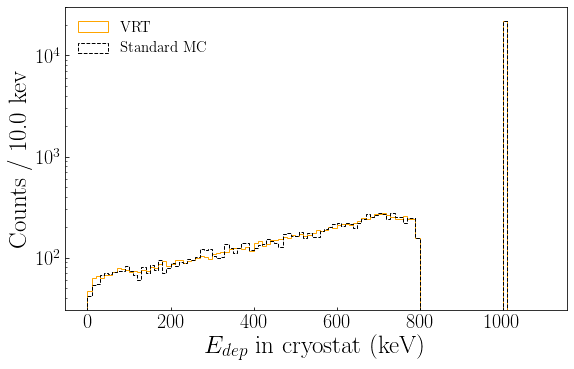

In [6]:
#make fig
ps.latexify()
nb=110
fig , ax=plt.subplots(1,1)

plotarray_largefid=ax.hist(df_vrt_cut['de1'],weights=df_vrt_cut['w'],bins=nb,range=(0,1100),histtype='step',label='VRT',color='Orange')
plotarray_nonvrt_largefid=ax.hist(df_nonvrt_cut_largefid['de1'],weights=df_nonvrt_cut_largefid['w'],bins=nb,range=(0,1100),histtype='step',label='Standard MC',
                          color='Black',linestyle='dashed')

ps.format_axes(ax)#format axes nice


ax.set_yscale('log')
ax.legend(prop={'size': 15},loc='upper left',frameon=False)

ax.set_xlabel('$E_{dep}$ in cryostat (keV)')
ax.set_ylabel('Counts / '+str(round(plotarray_largefid[1][-1])/nb)+' kev')#show bin size in y label 

#plt.savefig('val:Large_fiducial.pdf')

In [7]:
#As a check calculate sums
total_nonvrt=sum(plotarray_nonvrt_largefid[0])
total_vrt=sum(plotarray_largefid[0])
diff = np.abs(total_vrt-total_nonvrt)


print('total weight Standard MC = '+str(total_nonvrt))
print('total weight VRT= '+str(total_vrt))
print('difference = '+str(diff))

total weight Standard MC = 33572.0
total weight VRT= 33472.2917157888
difference = 99.7082842111995


In [8]:
#Calculate a chi2, mask the array because chi2 test doesn't work with 0's
masked_ref=np.ma.masked_where(plotarray_nonvrt_largefid[0]==0, plotarray_nonvrt_largefid[0])

chi2_nmc=chisquare(plotarray_largefid[0],f_exp=masked_ref)[0]/masked_ref.count()


print('chi2 of normal mc',chi2_nmc)
#not used because it is heavily dependant on PE peak. 

chi2 of normal mc 1.0726184694006007


## With normal fiducial vol##

In [9]:
#define cut
scatter_cut=((df_nonvrt['nscatters']==1)&(df_nonvrt['r2_1']<3249)&(np.abs(df_nonvrt['z1'])<67))
#apply cut
df_nonvrt_cut=df_nonvrt[scatter_cut]

Text(0,0.5,'Counts / 10.0 kev')

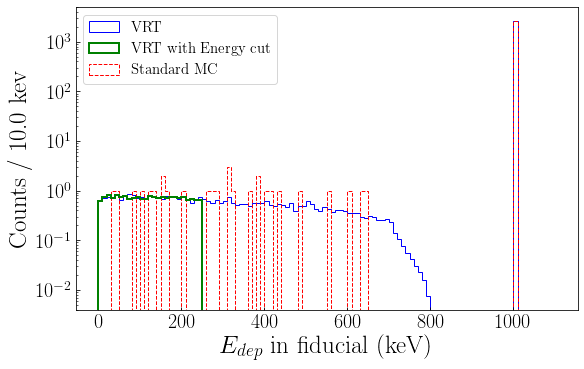

In [10]:
ps.latexify()
nb=110
fig , ax=plt.subplots(1,1)

plotarray_vrt=ax.hist(df_vrt['de1'],weights=df_vrt['w'],bins=nb,range=(0,1100),histtype='step',label='VRT',
                            color='Blue',linestyle='solid')
plotarray_vrt_Ecut=ax.hist(df_vrt_E_cut['de1'],weights=df_vrt_E_cut['w'],bins=nb,range=(0,1100),histtype='step',label='VRT with Energy cut',
                            color='Green',linestyle='solid',linewidth=2,zorder=15)

plotarray_nonvrt=ax.hist(df_nonvrt_cut['de1'],weights=df_nonvrt_cut['w'],bins=nb,range=(0,1100),histtype='step',label='Standard MC'
                          ,color='Red',linestyle='dashed')

ax.set_yscale('log')
ax.legend(prop={'size': 15},loc='upper left')


ps.format_axes(ax)


ax.set_xlabel('$E_{dep}$ in fiducial (keV)')
ax.set_ylabel('Counts / '+str(round(plotarray_vrt[1][-1])/nb)+' kev')#show bin size in y label 

#plt.savefig('val:full_spectrum.pdf')


In [11]:
total_vrt=sum(plotarray_vrt[0])
total_nonvrt=sum(plotarray_nonvrt[0])
diff = np.abs(total_vrt-total_nonvrt)


print('total weight Standard MC = '+str(total_nonvrt))
print('total weight VRT= '+str(total_vrt))
print('difference = '+str(diff))


total weight Standard MC = 2645.0
total weight VRT= 2666.1547308190625
difference = 21.15473081906248


In [12]:
masked_ref=np.ma.masked_where(plotarray_vrt[0]==0, plotarray_vrt[0])

chi2_nmc=chisquare(plotarray_nonvrt[0],f_exp=masked_ref)[0]/masked_ref.count()

print('chi2 of normal mc',chi2_nmc)


chi2 of normal mc 0.5967001165154326


## with E cut##

In [13]:
#define cut
E_cut = 250
scatter_Ecut=((df_nonvrt['nscatters']==1)&(df_nonvrt['r2_1']<3249)&(np.abs(df_nonvrt['z1'])<67)&(df_nonvrt['de']<E_cut))
scatter_Ecut_nofid=((df_nonvrt['nscatters']==1)&(df_nonvrt['de']<E_cut)&(np.abs(df_nonvrt['z1'])<67))

scatter_handcut_vrt=(df_vrt['de']<E_cut)
# cut the vrt without E cutoff in the simulation is called a hand-cut. 

#apply cut
df_nonvrt_cutE=df_nonvrt[scatter_Ecut]
df_nonvrt_cutE_nofid=df_nonvrt[scatter_Ecut_nofid]

df_vrt_handcut=df_vrt[scatter_handcut_vrt]

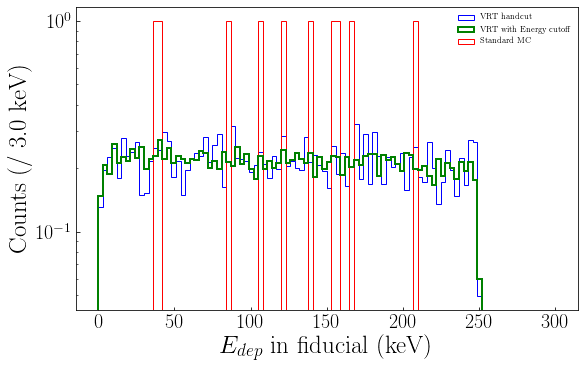

In [14]:
#make fig
ps.latexify()
nb=100
fig , ax=plt.subplots(1,1)

plotarray_vrt=ax.hist(df_vrt_handcut['de1'],weights=df_vrt_handcut['w'],bins=nb,range=(0,300),histtype='step',
                       label='VRT handcut',color='Blue',linestyle='solid')
plotarray_vrt_Ecut=ax.hist(df_vrt_E_cut['de1'],weights=df_vrt_E_cut['w'],bins=nb,range=(0,300),histtype='step',
                            label='VRT with Energy cutoff',color='Green',linestyle='solid',linewidth=2,zorder=15)

plotarray_nonvrt=ax.hist(df_nonvrt_cutE['de1'],weights=df_nonvrt_cutE['w'],bins=nb,range=(0,300),histtype='step',
                          label='Standard MC',color='Red')

ax.set_yscale('log')
ax.legend(prop={'size': 8},loc='upper right',frameon=False)

ax.set_xlabel('$E_{dep}$ in fiducial (keV)')
ax.set_ylabel('Counts (/ '+str(round(plotarray_vrt[1][-1])/nb)+' keV)')#show bin size in y label 
ps.format_axes(ax)

#plt.savefig('val:E_cut.pdf')


In [15]:
total_vrt=sum(plotarray_vrt[0])
total_vrt_Ecut=sum(plotarray_vrt_Ecut[0])
total_nonvrt=sum(plotarray_nonvrt[0])

print('total weight vrt= '+str(total_vrt))
print('total weight vrt E cut= '+str(total_vrt_Ecut))
print('total weight Standard MC = '+str(total_nonvrt))


print('diff vrt handcut and vrt Ecut = '+str(total_vrt-total_vrt_Ecut))
print('diff vrt handcut and Standard MC  = '+str(total_vrt-total_nonvrt))

total weight vrt= 18.153125625317514
total weight vrt E cut= 17.899583141334816
total weight Standard MC = 10.0
diff vrt handcut and vrt Ecut = 0.25354248398269874
diff vrt handcut and Standard MC  = 8.153125625317514


In [16]:
masked_ref=np.ma.masked_where(plotarray_vrt[0]==0, plotarray_vrt[0])
chi2_nmc=chisquare(plotarray_vrt_Ecut[0],f_exp=masked_ref)[0]/masked_ref.count()
print('chi2 of normal mc',chi2_nmc)

chi2 of normal mc 0.009301794646385239


## Radial distribution of interactions

In [17]:
df_vrt_E_cut.insert(7, 'r2_0', df_vrt_E_cut['x0']**2 + df_vrt_E_cut['y0']**2)
#also insert the r^2 of the start point 

In [18]:
#Split the data into gamma-rays from the top and bottom and from the sides
top_bottom_cut=((np.abs(df_vrt_E_cut['z0'])==75))
sized_cut=(np.round((df_vrt_E_cut['r2_0']))==4225)
df_vrt_top_bottom_cutout=df_vrt_E_cut[sized_cut]
df_vrt_sized_cutout=df_vrt_E_cut[top_bottom_cut]



23


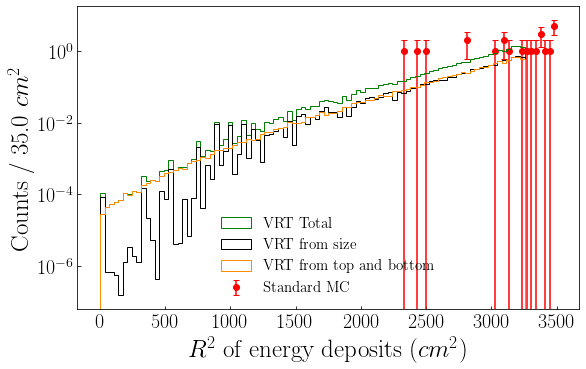

In [19]:
nb=100
ps.latexify()

fig , ax=plt.subplots(1,1,sharex=True)

counts, bin_edges = np.histogram(df_nonvrt_cutE_nofid['r2_1'],bins=nb,range=(0,3500))
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
err = np.sqrt(counts)

ax.errorbar(bin_centers,counts,yerr=err,fmt='o',label='Standard MC',color='Red')


plotarray_vrt=ax.hist(df_vrt_E_cut['r2_1'],weights=df_vrt_E_cut['w'],bins=nb,range=(0,3500),histtype='step',
                      label='VRT Total',color='Green',linestyle='solid',zorder=15)

plotarray_vrt=ax.hist(df_vrt_top_bottom_cutout['r2_1'],weights=df_vrt_top_bottom_cutout['w'],bins=nb,range=(0,3500),
                      histtype='step',label='VRT from size',color='Black',linestyle='solid',zorder=15)

plotarray_vrt=ax.hist(df_vrt_sized_cutout['r2_1'],weights=df_vrt_sized_cutout['w'],bins=nb,range=(0,3500),
                      histtype='step',label='VRT from top and bottom',color='DarkOrange',linestyle='solid',zorder=15)

ax.set_yscale('log')
ax.legend(loc='lower center',frameon=False,fontsize=15)

ax.set_xlabel('$R^2$ of energy deposits ($cm^2$)')
ax.set_ylabel('Counts / '+str(round(plotarray_vrt[1][-1])/nb)+' $cm^2$')#show bin size in y label 
ps.format_axes(ax)


#plt.savefig('val:R2ofEcut_topcheck_no_fidcut.pdf')
print(sum(counts))


In [20]:
#Check if totals add up
print('Total:'+str(sum(df_vrt_E_cut['w'])))
print('From side:'+str(sum(df_vrt_top_bottom_cutout['w'])))
print('From top/bottom:'+str(sum(df_vrt_sized_cutout['w'])))


Total:695343.8995828646
From side:490170.96469240874
From top/bottom:205200.93489060184


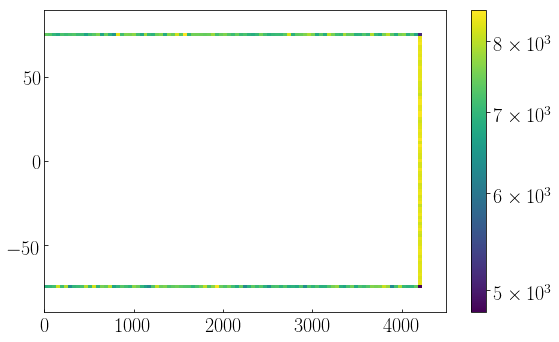

In [21]:
# plot start points 

# plot is completely useless since the density ratios are different. 

ps.latexify()

fig , ax=plt.subplots(1,1,sharex=True)

im1=ax.hist2d(df_vrt_top_bottom_cutout['r2_0'],df_vrt_top_bottom_cutout['z0'],bins=(101,101),range=[[0,4500],[-90,90]],norm=LogNorm())
im2=ax.hist2d(df_vrt_sized_cutout['r2_0'],df_vrt_sized_cutout['z0'],bins=(101,101),range=[[0,4500],[-90,90]],norm=LogNorm())

# im1=axes[1].hist2d(df_vrt_2s['r2'],df_vrt_2s['z1'],weights=df_vrt_2s['w'],bins=(101,101),range=[[0,maxv],[-80,80]],norm=LogNorm())
# im2=axes[1].hist2d(df_vrt_2s['r2_2'],df_vrt_2s['z2'],weights=df_vrt_2s['w'],bins=(101,101),range=[[0,maxv],[-80,80]],norm=LogNorm())


ps.format_axes(ax)

fig.colorbar(im1[3])

plt.show(fig)
#plt.savefig('val:distcheck.pdf')


## Fancy plot with all the spectra together##

In [22]:
#If only the last is made, make all cuts here
#define cut
# E_cut=250
# scatter_cut_largefid=((df_nonvrt['nscatters']==1)&(df_nonvrt['r2_1']<4096)&(np.abs(df_nonvrt['z1'])<74)&(df_nonvrt['de']<1001))
# scatter_cut_vrt=((df_vrt_largefid['nscatters']==1)&(df_vrt_largefid['r2_1']<4096)&(np.abs(df_vrt_largefid['z1'])<74))
# scatter_cut=((df_nonvrt['nscatters']==1)&(df_nonvrt['r2_1']<3249)&(np.abs(df_nonvrt['z1'])<67))
# scatter_Ecut=((df_nonvrt['nscatters']==1)&(df_nonvrt['r2_1']<3249)&(np.abs(df_nonvrt['z1'])<67)&(df_nonvrt['de']<E_cut))



# df_nonvrt_cut_largefid=df_nonvrt[scatter_cut_largefid]
# df_vrt_cut=df_vrt_largefid[scatter_cut_vrt]
# df_nonvrt_cut=df_nonvrt[scatter_cut]
# df_nonvrt_cutE=df_nonvrt[scatter_Ecut]

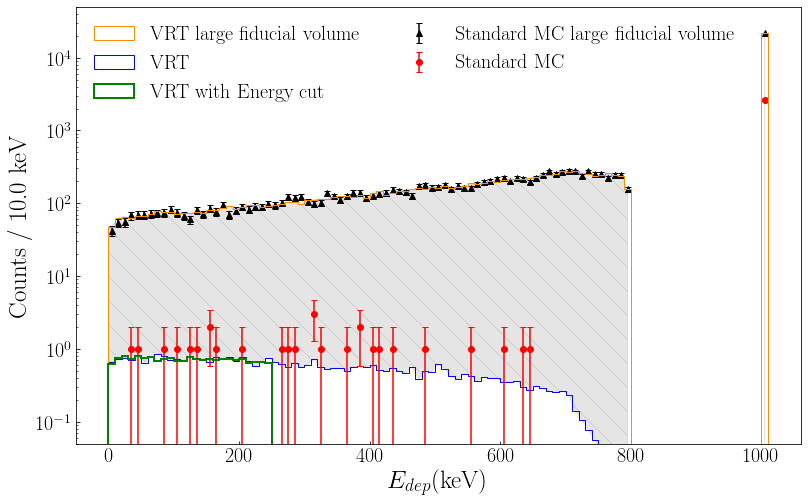

In [23]:
ps = style(figure_width = 13,spine_color= 'Black')
ps.latexify()
nb=101
fig , ax=plt.subplots(1,1,sharex=True)

#histogram large fiducial VRT
plotarray_largefid=ax.hist(df_vrt_cut['de1'],weights=df_vrt_cut['w'],bins=nb,range=(0,1010),
                           histtype='step',label='VRT large fiducial volume',color='darkorange',linewidth=1,zorder=10)

#points large fiducial non-VRT
counts, bin_edges = np.histogram(df_nonvrt_cut_largefid['de1'],
                                 weights=df_nonvrt_cut_largefid['w'],bins=nb,range=(0,1010))
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
err = np.sqrt(counts)
ax.errorbar(bin_centers,counts,yerr=err,fmt='^',label='Standard MC large fiducial volume',color='Black')


#histogram normal fiducial VRT
plotarray_vrt=ax.hist(df_vrt['de1'],weights=df_vrt['w'],bins=nb,range=(0,1010),histtype='step',label='VRT',
                            color='Blue',linestyle='solid',linewidth=1)

#histogram normal fiducial VRT with E-cut
plotarray_vrt_Ecut=ax.hist(df_vrt_E_cut['de1'],weights=df_vrt_E_cut['w'],bins=nb,range=(0,1010),histtype='step',
                           label='VRT with Energy cut',color='Green',linestyle='solid',linewidth=2,zorder=15)

#points normal fiducial non-VRT
counts_normalfid,bin_edges_nonvrt =np.histogram(df_nonvrt_cut['de1'],weights=df_nonvrt_cut['w'],bins=nb,range=(0,1010))
err_normalfid = np.sqrt(counts_normalfid)
ax.errorbar(bin_centers,counts_normalfid,yerr=err_normalfid,fmt='o',label='Standard MC',color='Red')


#fill area Scatters outside fiducial volume
x = np.append(plotarray_vrt[1][0],bin_centers)
y0= np.append(plotarray_vrt[0][0],plotarray_vrt[0])

y1= np.append(plotarray_largefid[0][0],plotarray_largefid[0])

ax.fill_between(x,y0,y1,hatch='\\',color='Gray',alpha=0.2)#,label='Scatters outside fiducial volume')



ax.set_yscale('log')
ax.set_ylim(0.05,50000)
ax.legend(loc='upper left',frameon=False,ncol=2,fontsize=20)




ax.set_xlabel('$E_{dep}$ (keV)')
ax.set_ylabel('Counts / '+str(round(plotarray_largefid[1][-1])/nb)+' keV')
#show bin size in y label 


ps.format_axes(ax)

#plt.savefig('val:Spectra.pdf')


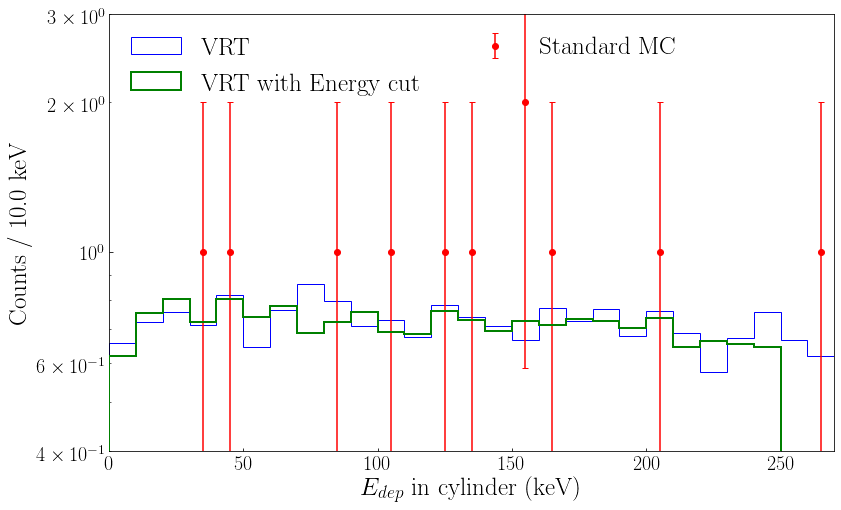

In [24]:
#zoom on the 250keV part
ps.latexify()
nb=101
fig , ax=plt.subplots(1,1,sharex=True)



#histogram normal fiducial VRT
plotarray_vrt=ax.hist(df_vrt['de1'],weights=df_vrt['w'],bins=nb,range=(0,1010),histtype='step',label='VRT',
                            color='Blue',linestyle='solid',linewidth=1)

#histogram normal fiducial VRT with E-cut
plotarray_vrt_Ecut=ax.hist(df_vrt_E_cut['de1'],weights=df_vrt_E_cut['w'],bins=nb,range=(0,1010),histtype='step',
                           label='VRT with Energy cut',color='Green',linestyle='solid',linewidth=2,zorder=15)

#points normal fiducial non-VRT
counts_normalfid,bin_edges_nonvrt =np.histogram(df_nonvrt_cut['de1'],weights=df_nonvrt_cut['w'],bins=nb,range=(0,1010))
err_normalfid = np.sqrt(counts_normalfid)
ax.errorbar(bin_centers,counts_normalfid,yerr=err_normalfid,fmt='o',label='Standard MC',color='Red')


ax.set_yscale('log')
ax.set_ylim(0.05,10)
ax.legend(loc='upper left',frameon=False,ncol=2)




ax.set_xlabel('$E_{dep}$ in cylinder (keV)')
ax.set_ylabel('Counts / '+str(round(plotarray_largefid[1][-1])/nb)+' keV')
#show bin size in y label 
ax.set_xlim(0,270)
ax.set_ylim(0.4,3)

ps.format_axes(ax)

#plt.savefig('val:Spectra_zoom.pdf')
